LEVEL 3

In [28]:
#import all necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#load the dataset
df = pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Task 1: Restaurant Reviews

Analyze the text reviews to identify the mo t
common positive and negative keyword.

Calculate the average length of review  and
explore if there is a relationship b tween
review length and rating.

In [30]:
# Count occurrences of each rating text
positive_counts = df[df['Rating text'].isin(['Excellent', 'Very Good'])]['Rating text'].value_counts()
negative_counts = df[df['Rating text'].isin(['Average', 'Good'])]['Rating text'].value_counts()

# Determine the most common positive and negative ratings
most_common_positive = positive_counts.idxmax()
most_common_negative = negative_counts.idxmax()

print(f"The most common positive keyword is '{most_common_positive}'.")
print(f"The most common negative keyword is '{most_common_negative}'.")

The most common positive keyword is 'Very Good'.
The most common negative keyword is 'Average'.


In [32]:
# Calculate the length of each review
df['Review Length'] = df['Rating text'].apply(len)

# Calculate the average review length
average_review_length = df['Review Length'].mean()

print(f"Average Review Length: {average_review_length:.2f} characters")

# Explore the relationship between review length and rating
correlation = df['Review Length'].corr(df['Aggregate rating'])

print(f"Correlation between Review Length and Rating: {correlation:.2f}")

Average Review Length: 7.02 characters
Correlation between Review Length and Rating: -0.48


Task 2: Votes Analysis

Identify the restaurants with the highest a d
lowest number of vote.

Analyze if there is a correlation betwee  the
number of votes and the ratin  of a
restaurant.

In [60]:
# Highest votes
highest_votes = df.loc[df['Votes'].idxmax(),'Restaurant Name']
# Lowest votes
lowest_votes = df.loc[df['Votes'].idxmin(),'Restaurant Name']

In [61]:
print(highest_votes)

Toit


In [62]:
print(lowest_votes)

Cantinho da Gula


In [63]:
# Explore the relationship between review length and rating
correlation = df['Votes'].corr(df['Aggregate rating'])

print(f"Correlation between Votes and Rating: {correlation:.2f}")

Correlation between Votes and Rating: 0.31


Task 3: Price Range vs. Online Delivery and
Table Booking

Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
Determine if higher-priced restaurants are more likely to offer these services.

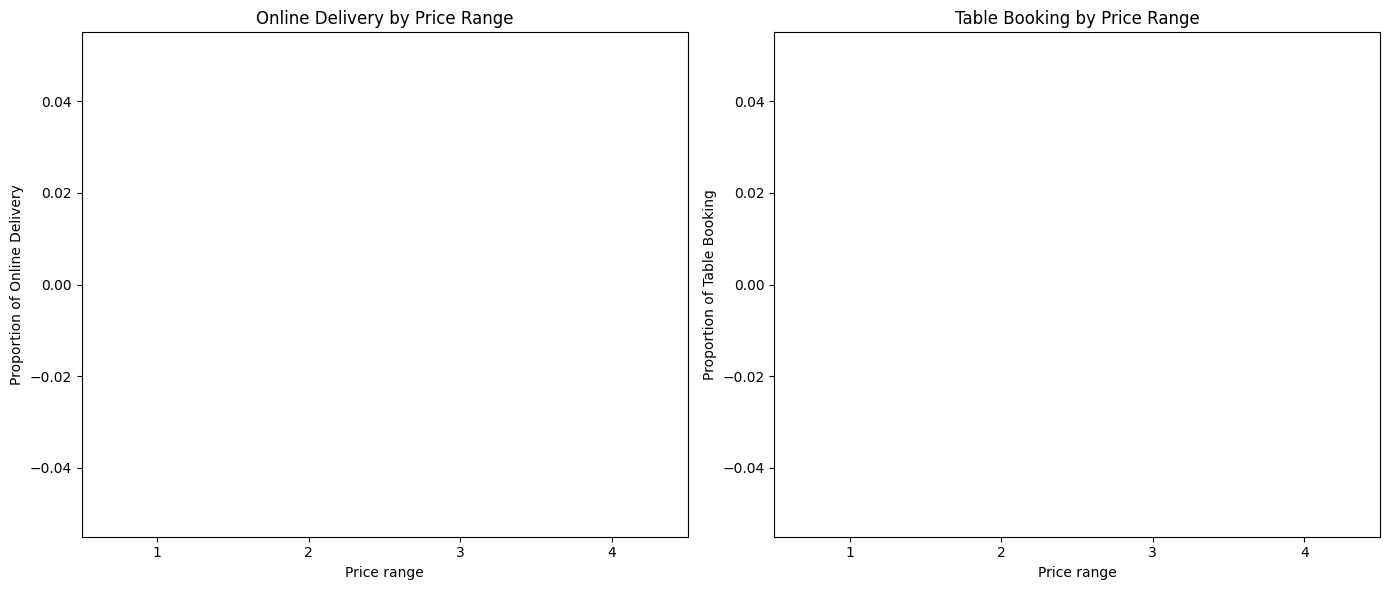

In [86]:
# Convert 'Online delivery' and 'Table booking' columns to binary values
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot the data
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(ax=axes[0], x='Price range', y='Has Online delivery', data=df)
axes[0].set_title('Online Delivery by Price Range')
axes[0].set_ylabel('Proportion of Online Delivery')

sns.barplot(ax=axes[1], x='Price range', y='Has Table booking', data=df)
axes[1].set_title('Table Booking by Price Range')
axes[1].set_ylabel('Proportion of Table Booking')

plt.tight_layout()
plt.show()



In [89]:
# Step 1: Create contingency tables
contingency_table_delivery = pd.crosstab(df['Price range'], df['Has Online delivery'])
contingency_table_booking = pd.crosstab(df['Price range'], df['Has Table booking'])

# Step 2: Perform chi-square tests
chi2_delivery, p_delivery, dof_delivery, expected_delivery = stats.chi2_contingency(contingency_table_delivery)
chi2_booking, p_booking, dof_booking, expected_booking = stats.chi2_contingency(contingency_table_booking)

# Step 3: Interpret the results
print("Online Delivery Service Analysis")
print("Chi-square Statistic:", chi2_delivery)
print("P-value:", p_delivery)
print("Degrees of Freedom:", dof_delivery)
print("Expected Frequencies:\n", expected_delivery)
if p_delivery < 0.05:
    print("There is a significant association between price range and online delivery service.")
else:
    print("There is no significant association between price range and online delivery service.")

print("\nTable Booking Service Analysis")
print("Chi-square Statistic:", chi2_booking)
print("P-value:", p_booking)
print("Degrees of Freedom:", dof_booking)
print("Expected Frequencies:\n", expected_booking)
if p_booking < 0.05:
    print("There is a significant association between price range and table booking service.")
else:
    print("There is no significant association between price range and table booking service.")


Online Delivery Service Analysis
Chi-square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
 [[4444.]
 [3113.]
 [1408.]
 [ 586.]]
There is no significant association between price range and online delivery service.

Table Booking Service Analysis
Chi-square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
 [[4444.]
 [3113.]
 [1408.]
 [ 586.]]
There is no significant association between price range and table booking service.
